# Asignación óptima de tutorías para reducir riesgo académico (Corhuila)
**Unidad 1 · Optimización clásica en IA**  
**Fecha:** 2025-08-09

**Objetivo de la tarea.** Formular y resolver un problema de optimización usando un método clásico (**programación lineal – Simplex**) sobre datos reales de pruebas diagnósticas.

**Clasificación del problema.** Determinista · Lineal (tras linearización) · Con restricciones · Variables continuas.

**Equipo de trabajo:**
- Cindy Liliana Vargas Duque
- Luis Angel Vargas Narvaez
- Jesús Ariel González Bonilla


<div style='background:#166949;padding:18px 22px;border-radius:14px;border:1px solid #1fae74;color:#f5fdf9;'>
<h2 style='margin-top:0;color:#ffcc29;'>Resumen Ejecutivo</h2>
<p style='font-size:14px;line-height:1.55;margin:0 0 10px;'>Se formula y resuelve un problema de asignación óptima de horas de tutoría para reducir el número proyectado de estudiantes en riesgo académico. El modelo (Programación Lineal) distribuye horas entre programas y áreas respetando presupuesto, capacidades y equidad mínima. Los resultados muestran reducción agregada significativa y permiten priorizar programas y áreas con mayor eficiencia marginal. El análisis de sensibilidad aporta un punto de rendimientos decrecientes útil para decisiones presupuestales y el clustering segmenta perfiles de intervención.</p>
<ul style='margin:0 0 0 20px;padding:0;font-size:13.2px;line-height:1.5;'>
  <li><strong>Objetivo:</strong> Minimizar riesgo académico estimado.</li>
  <li><strong>Método:</strong> Programación Lineal (Simplex / HiGHS).</li>
  <li><strong>Variables clave:</strong> Horas por programa–semestre–área.</li>
  <li><strong>Restricciones:</strong> Presupuesto, capacidad por área, equidad mínima.</li>
  <li><strong>Valor agregado:</strong> Transparencia, escalabilidad y soporte cuantitativo a políticas de tutoría.</li>
</ul>
</div>

<div style="background:#0d3d2c;border:1px solid #1fae74;padding:24px;border-radius:14px;color:#f5fdf9;font-family:system-ui,Segoe UI,sans-serif;box-shadow:0 4px 12px rgba(0,0,0,.35);">
  <h1 style="margin-top:0;font-size:30px;letter-spacing:.5px;color:#4ef5b4;">Asignación Óptima de Tutorías para Mitigar Riesgo Académico</h1>
  <p style="font-size:15px;line-height:1.5;">Este informe interactivo guía paso a paso la <strong>formulación, resolución y análisis</strong> de un problema de optimización lineal aplicado a la gestión de tutorías institucionales. Está diseñado para que alguien sin experiencia previa en optimización comprenda: <em>qué problema resolvemos, cómo lo modelamos, por qué usamos Simplex y qué decisiones produce.</em></p>
  <div style="display:flex;flex-wrap:wrap;gap:14px;margin-top:10px;">
    <div style="flex:1 1 250px;background:#124f39;padding:14px 16px;border-radius:10px;border-left:5px solid #1fae74;">
      <h3 style="margin:0 0 6px 0;font-size:14px;text-transform:uppercase;letter-spacing:.5px;color:#4ef5b4;">Datos</h3>
      <p style="margin:0;font-size:13.5px;">Resultados por estudiante en 4 áreas diagnósticas → derivamos conteos de riesgo por cohorte (programa-semestre-área).</p>
    </div>
    <div style="flex:1 1 250px;background:#124f39;padding:14px 16px;border-radius:10px;border-left:5px solid #1fae74;">
      <h3 style="margin:0 0 6px 0;font-size:14px;text-transform:uppercase;letter-spacing:.5px;color:#4ef5b4;">Objetivo</h3>
      <p style="margin:0;font-size:13.5px;">Minimizar el total estimado de estudiantes en riesgo asignando horas de tutoría con restricciones de presupuesto, capacidad y equidad.</p>
    </div>
    <div style="flex:1 1 250px;background:#124f39;padding:14px 16px;border-radius:10px;border-left:5px solid #1fae74;">
      <h3 style="margin:0 0 6px 0;font-size:14px;text-transform:uppercase;letter-spacing:.5px;color:#4ef5b4;">Método</h3>
      <p style="margin:0;font-size:13.5px;">Programación Lineal (Simplex / HiGHS). Linearizamos la función de riesgo mediante variables auxiliares.</p>
    </div>
  </div>
  <div style="margin-top:14px;display:flex;flex-wrap:wrap;gap:12px;">
    <div style="flex:1 1 340px;background:#166949;padding:14px 16px;border-radius:10px;">
      <h3 style="margin:0 0 6px 0;font-size:13px;text-transform:uppercase;letter-spacing:.5px;color:#ffcc29;">Mapa de Secciones</h3>
      <ol style="margin:4px 0 0 18px;padding:0;font-size:13.2px;line-height:1.45;">
        <li>Introducción</li>
        <li>Formulación matemática del modelo</li>
        <li>Carga y preparación de datos</li>
        <li>Clasificación y justificación del método</li>
        <li>Construcción, resolución y resultados</li>
        <li>Sensibilidad al presupuesto</li>
        <li>Conclusiones y recomendaciones</li>
      </ol>
    </div>
    <div style="flex:1 1 340px;background:#166949;padding:14px 16px;border-radius:10px;">
      <h3 style="margin:0 0 6px 0;font-size:13px;text-transform:uppercase;letter-spacing:.5px;color:#ffcc29;">Cómo Leer</h3>
      <ul style="margin:4px 0 0 18px;padding:0;font-size:13.2px;line-height:1.45;">
        <li><strong>Cajas verdes</strong>: definiciones y conceptos.</li>
        <li><strong>Cajas ámbar</strong>: advertencias / supuestos.</li>
        <li><strong>Cajas azul-verde</strong>: interpretación de resultados.</li>
        <li><strong>Bloques clave</strong>: decisiones accionables o insights.</li>
      </ul>
    </div>
  </div>
</div>

## 1. Introducción
**Contexto.** La Coporración Universitaria del Huila - Corhuila dispone de resultados individuales en cuatro áreas: Lectura Crítica (LC), Competencia Ciudadana (CC), Razonamiento Cuantitativo (RQ) e Inglés (ING). Queremos asignar *horas de tutoría* por **programa–semestre–área** para **minimizar** el número esperado de estudiantes en riesgo.

**Definiciones.** Consideramos "en riesgo" a quienes están por debajo del percentil 40 dentro de su cohorte (programa–semestre) en cada área.

**Resumen del Enfoque.** Se construye un modelo de Programación Lineal que asigna horas bajo restricciones operativas y de equidad, estimando el riesgo residual mediante linearización.


## 2. Formulación matemática del modelo
**Modelo (Programación lineal).**
- Conjuntos: $P$ programas; $S$ semestres; $A=\{LC,CC,RQ,ING\}$ áreas.
- Datos: $r_{p,s,a}$ conteo base en riesgo; $H$ presupuesto total de horas; $C_a$ capacidad por área; $k_a$ impacto (reducción esperada por hora en área $a$); $h^{\min}$ piso de equidad.
- Variables: $x_{p,s,a} \ge 0$ horas de tutoría; $y_{p,s,a} \ge 0$ riesgo posterior estimado.

**Objetivo:** $\min \sum_{p,s,a} y_{p,s,a}$

**Restricciones:**
1. $y_{p,s,a} \ge r_{p,s,a} - k_a x_{p,s,a}$ (lineariza riesgo residual)
2. $\sum_{p,s,a} x_{p,s,a} \le H$ (presupuesto)
3. $\sum_{p,s} x_{p,s,a} \le C_a$ $\forall a$ (capacidad por área)
4. $\sum_{a} x_{p,s,a} \ge h^{\min}$ $\forall (p,s)$ (equidad)
5. $x_{p,s,a}, y_{p,s,a} \ge 0$

Esta estructura asegura convexidad y resolubilidad exacta con Simplex / HiGHS.

### 2.1 Resumen formal del modelo (vista rápida)
Conjuntos: P (programas), S (semestres), A = {LC, CC, RQ, ING}.

Parámetros:
- r_{p,s,a}: estudiantes en riesgo base.
- K_a: reducción esperada (estudiantes/hora) en área a.
- H_TOTAL: presupuesto total de horas.
- CAP_AREA[a]: límite de horas por área.
- H_MIN: mínimo de horas por cohorte (equidad).

Variables (todas continuas, ≥0):
- x_{p,s,a}: horas asignadas.
- y_{p,s,a}: riesgo posterior estimado.

Función objetivo:
min Z = Σ_{p,s,a} y_{p,s,a}

Restricciones:
1. y_{p,s,a} ≥ r_{p,s,a} - K_a x_{p,s,a}
2. Σ_{p,s,a} x_{p,s,a} ≤ H_TOTAL
3. Σ_{p,s} x_{p,s,a} ≤ CAP_AREA[a]  ∀ a
4. Σ_{a} x_{p,s,a} ≥ H_MIN  ∀ (p,s)
5. x_{p,s,a}, y_{p,s,a} ≥ 0

Tipo: PL determinista con solución óptima garantizada mediante Simplex/HiGHS.

In [65]:
# Imports (añadimos seaborn y estilos enriquecidos)
import pandas as pd
import numpy as np
from pathlib import Path
from pulp import LpProblem, LpMinimize, LpVariable, lpSum, LpStatus
from pulp import HiGHS_CMD
import matplotlib.pyplot as plt
import seaborn as sns

# Estilos HTML / helpers
try:
    from enhanced_style_boxes import (
        inject_styles, info_box, concept_card, section_block, param_card,
        key_insight, show_formula, flex_columns, create_timeline,
        setup_plot_style, create_heatmap, create_comparison_chart
    )
except ImportError:
    # Fallback mínimo si el archivo no está disponible
    def inject_styles(*args, **kwargs):
        pass
    def info_box(content, **k):
        from IPython.display import HTML; return HTML(f"<div style='background:#111;color:#eee;padding:10px;border-left:4px solid #0a5;'>{content}</div>")
    def setup_plot_style():
        pass

inject_styles()
setup_plot_style()
sns.set_theme(style="darkgrid")

## 3. Carga y preparación de datos
**Nota:** este notebook usa por defecto el archivo subido al entorno. Si lo ejecutas localmente, cambia la ruta a tu archivo.

<div style='background:#124f39;padding:18px 20px;border-radius:12px;border:1px solid #1fae74;color:#f5fdf9;'>
  <h2 style='margin-top:0;color:#4ef5b4;'>3.1 Exploración inicial de datos</h2>
  <p style='line-height:1.55;font-size:14px;'>Antes de modelar, verificamos la estructura de los datos y generamos <strong>gráficas diagnósticas</strong> para entender la variabilidad y potencial de mejora. Esto refuerza el criterio de la rúbrica sobre <em>comprensión del problema y sus componentes</em>.</p>
  <div style='display:flex;flex-wrap:wrap;gap:18px;margin-top:8px;'>
    <div style='flex:1 1 320px;background:#166949;padding:14px 16px;border-radius:10px;'>
      <h3 style='margin:0 0 6px 0;font-size:13px;text-transform:uppercase;letter-spacing:.5px;color:#ffcc29;'>Objetivo de esta fase</h3>
      <ul style='margin:6px 0 0 18px;padding:0;font-size:13.2px;line-height:1.45;'>
        <li>Detectar valores faltantes.</li>
        <li>Observar dispersión por área.</li>
        <li>Identificar heterogeneidad entre cohortes.</li>
        <li>Respaldar la posterior definición de riesgo.</li>
      </ul>
    </div>
    <div style='flex:1 1 320px;background:#166949;padding:14px 16px;border-radius:10px;'>
      <h3 style='margin:0 0 6px 0;font-size:13px;text-transform:uppercase;letter-spacing:.5px;color:#ffcc29;'>Gráficas a generar</h3>
      <ol style='margin:6px 0 0 18px;padding:0;font-size:13.2px;line-height:1.45;'>
        <li>Distribuciones (KDE / histogramas) por área.</li>
        <li>Boxplots comparativos.</li>
        <li>Heatmap de conteos de riesgo (posterior).</li>
      </ol>
    </div>
  </div>
</div>

In [66]:
# Importa data
DATA_PATH = Path("data.xlsx")

assert DATA_PATH.exists(), f"No se encontró el archivo: {DATA_PATH}"

# Hoja
sheet = "Export"
df = pd.read_excel(DATA_PATH, sheet_name=sheet)

# Estandarizar nombres de columnas (sin afectar acentos)
df.columns = [c.strip() for c in df.columns]

# Mostrar un vistazo
display(df.head(5))
print("Filas:", len(df))
print("Columnas:", df.columns.tolist())


PERIODO ESTUDIANTE IDENTIFICACIÓN          NOMBRES            APELLIDOS  \
0   20221    ANTIGUO     1000046418  CRISTIAN CAMILO     BOTACHE ESPINOSA   
1   20221    ANTIGUO     1000062000        VALENTINA  AVENDAÑO VILLANUEVA   
2   20221    ANTIGUO     1000063394     PAULA ANDREA          LEIVA TIQUE   
3   20221    ANTIGUO     1000156473    JAVIER STEVEN         AVILA PLAZAS   
4   20221    ANTIGUO     1000163924    JUAN FERNANDO      OROZCO TRUJILLO   

                           PROGRAMA ACADÉMICO  SEMESTRE  LECTURA CRÍTICA  \
0                INGENIERIA DE SISTEMAS-NEIVA       9.0            230.0   
1              NEGOCIOS INTERNACIONALES-NEIVA       9.0              NaN   
2      MEDICINA VETERINARIA Y ZOOTECNIA-NEIVA       9.0            135.0   
3                  INGENIERIA AMBIENTAL-NEIVA       9.0            128.3   
4  ADMINISTRACION BANCARIA Y FINANCIERA-NEIVA       7.0              NaN   

  ESCALA LECTURA CRÍTICA  COMPETENCIA CIUDADANA ESCALA COMPETENCIA CIUDADANA  \
0      NIVEL DESEMPEÑO 4                  195.0            NIVEL DESEMPEÑO 3   
1            NO PRESENTÓ                    NaN                  NO PRESENTÓ   
2      NIVEL DESEMPEÑO 2                  120.0            NIVEL DESEMPEÑO 1   
3      NIVEL DESEMPEÑO 2                  195.0            NIVEL DESEMPEÑO 3   
4            NO PRESENTÓ                    NaN                  NO PRESENTÓ   

   RAZONAMIENTO CUANTITATIVO ESCALA RAZONAMIENTO CUANTITATIVO  INGLÉS  \
0                      138.8                NIVEL DESEMPEÑO 2   258.3   
1                        NaN                      NO PRESENTÓ   258.3   
2                        NaN                      NO PRESENTÓ   150.0   
3                      213.8                NIVEL DESEMPEÑO 4   247.9   
4                        NaN                      NO PRESENTÓ     NaN   

  ESCALA INGLÉS  
0            B2  
1            B2  
2            A2  
3            B2  
4   NO PRESENTÓ

Filas: 9698
Columnas: ['PERIODO', 'ESTUDIANTE', 'IDENTIFICACIÓN', 'NOMBRES', 'APELLIDOS', 'PROGRAMA ACADÉMICO', 'SEMESTRE', 'LECTURA CRÍTICA', 'ESCALA LECTURA CRÍTICA', 'COMPETENCIA CIUDADANA', 'ESCALA COMPETENCIA CIUDADANA', 'RAZONAMIENTO CUANTITATIVO', 'ESCALA RAZONAMIENTO CUANTITATIVO', 'INGLÉS', 'ESCALA INGLÉS']


### 3.2 Etiquetado de riesgo por cohorte
Marcamos como riesgo (1) a quienes están bajo el percentil 40 dentro de su **programa–semestre** por área; ignoramos los `NaN` (NO PRESENTÓ). Generamos una tabla de conteos $r_{p,s,a}$.

### 3.3 Interpretación exploratoria
<div style='background:#166949;padding:16px 18px;border-radius:10px;border:1px solid #1fae74;color:#f5fdf9;'>
<h3 style='margin-top:0;color:#ffcc29;'>Lectura de las distribuciones</h3>
<p style='font-size:14px;line-height:1.5;margin:0 0 10px;'>Las distribuciones permiten observar dónde hay mayor dispersión y potencial de reducción de riesgo. Áreas con <strong>cola más baja pronunciada</strong> y <strong>asimetría</strong> tienden a tener más estudiantes susceptibles de quedar bajo el percentil de corte usado para riesgo.</p>
<ul style='margin:0 0 0 20px;padding:0;font-size:13.4px;line-height:1.45;'>
  <li><strong>Boxplots</strong> evidencian diferencias en la mediana entre áreas → priorización posible si coeficientes de impacto (K) son similares.</li>
  <li><strong>Dispersión alta</strong> aumenta la probabilidad de que tutorías focalizadas tengan retorno (más masa bajo el corte).</li>
  <li>Estos hallazgos soportan la necesidad de un modelo que reasigne horas hacia cohortes con <em>mayor densidad bajo el umbral</em>.</li>
</ul>
</div>

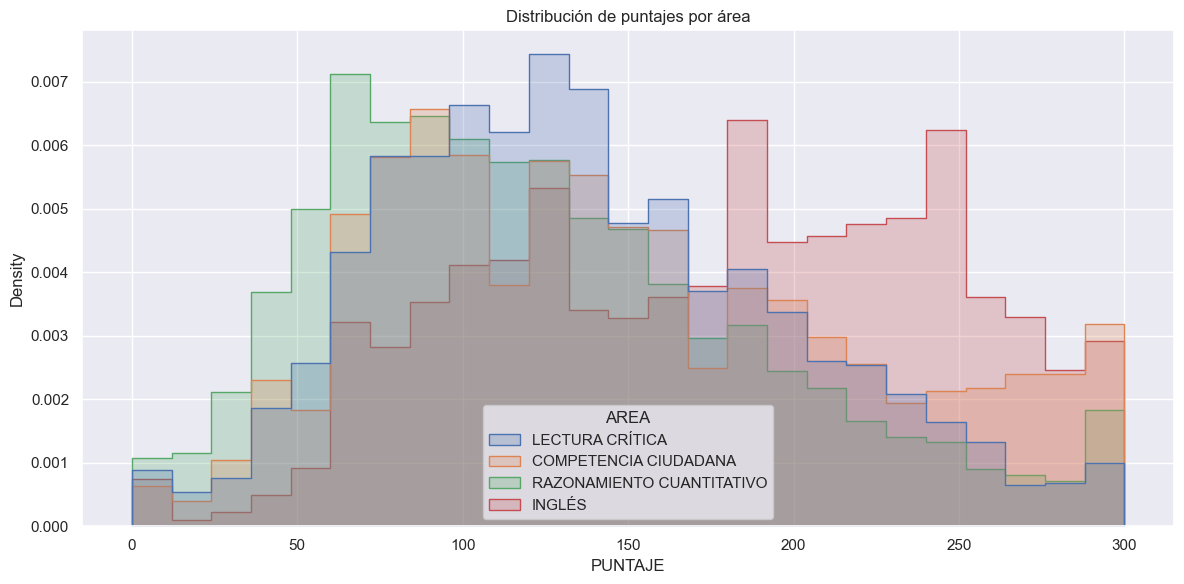

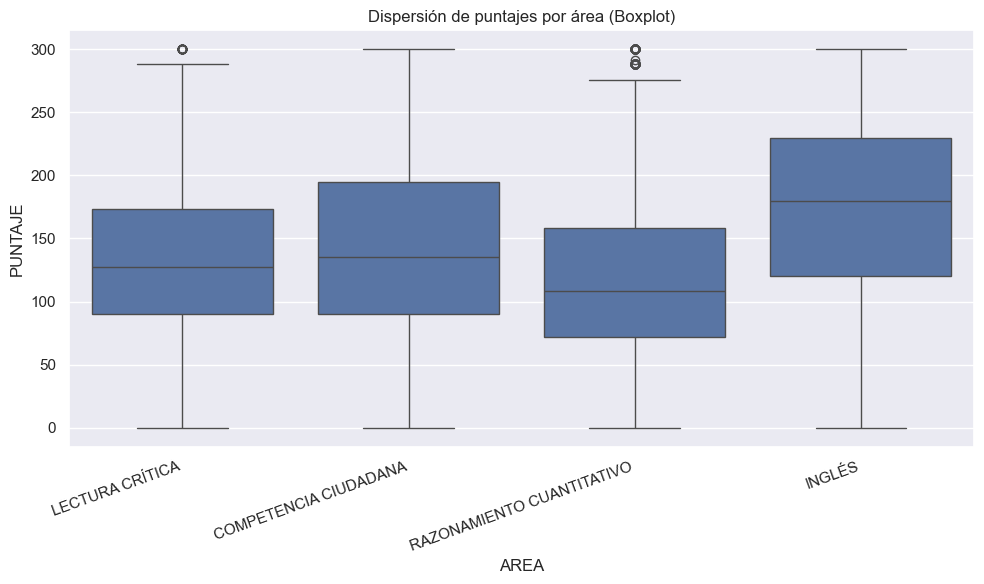

count    mean    std  min    25%    50%    75%  \
AREA                                                                         
COMPETENCIA CIUDADANA      8569.0  145.56  71.47  0.0   90.0  135.0  195.0   
INGLÉS                     8787.0  175.90  68.38  0.0  120.0  180.0  230.0   
LECTURA CRÍTICA            8698.0  133.76  60.38  0.0   90.0  127.0  173.3   
RAZONAMIENTO CUANTITATIVO  8636.0  120.81  65.36  0.0   72.0  108.0  158.3   

                             max  
AREA                              
COMPETENCIA CIUDADANA      300.0  
INGLÉS                     300.0  
LECTURA CRÍTICA            300.0  
RAZONAMIENTO CUANTITATIVO  300.0

In [67]:
# Exploración visual inicial de las distribuciones por área
score_cols = [c for c in df.columns if c.upper() in ["LECTURA CRÍTICA","COMPETENCIA CIUDADANA","RAZONAMIENTO CUANTITATIVO","INGLÉS"]]

long_df = df.melt(id_vars=[col for col in df.columns if col not in score_cols], value_vars=score_cols,
                  var_name="AREA", value_name="PUNTAJE")

plt.figure(figsize=(12,6))
sns.histplot(data=long_df, x="PUNTAJE", hue="AREA", element="step", stat="density", common_norm=False, bins=25)
plt.title("Distribución de puntajes por área")
plt.tight_layout()
plt.show()

plt.figure(figsize=(10,6))
sns.boxplot(data=long_df, x="AREA", y="PUNTAJE")
plt.title("Dispersión de puntajes por área (Boxplot)")
plt.xticks(rotation=20, ha='right')
plt.tight_layout()
plt.show()

# Resumen estadístico por área
summary_stats = long_df.groupby("AREA")["PUNTAJE"].describe()[["count","mean","std","min","25%","50%","75%","max"]]
display(summary_stats.round(2))

In [68]:
AREAS = ["LECTURA CRÍTICA","COMPETENCIA CIUDADANA","RAZONAMIENTO CUANTITATIVO","INGLÉS"]

# Calcular umbral por cohorte y área
grp = df.groupby(["PROGRAMA ACADÉMICO","SEMESTRE"], dropna=False)

def risk_flag(series, q=0.40, min_valid=3):
    """Devuelve 1 si el valor está bajo el cuantil q dentro de la cohorte, 0 en otro caso.
    Reglas de robustez:
    - Ignora NaN al computar cuantiles.
    - Si hay menos de min_valid valores numéricos, marca 0 (insuficiente evidencia para catalogar riesgo).
    - Si todos los valores válidos son iguales, el cuantil se vuelve ese valor; se considera riesgo estrictamente '< thr'.
    """
    s = series.dropna()
    if len(s) < min_valid:
        return pd.Series([0]*len(series), index=series.index)
    thr = s.quantile(q)
    return (series < thr).astype(int)

for a in AREAS:
    df[f"RISK_{a}"] = grp[a].transform(lambda g: risk_flag(g))

# Conteos r_{p,s,a}
risk_counts = (
    df.groupby(["PROGRAMA ACADÉMICO","SEMESTRE"])
      [[f"RISK_{a}" for a in AREAS]]
      .sum()
      .reset_index()
      .rename(columns={f"RISK_{a}": f"R_{a}" for a in AREAS})
)

display(risk_counts.head(10))
print("Cohortes (programa-semestre):", len(risk_counts))

PROGRAMA ACADÉMICO  SEMESTRE  R_LECTURA CRÍTICA  \
0     ADMINISTRACION BANCARIA Y FINANCIERA-NEIVA       1.0                  9   
1     ADMINISTRACION BANCARIA Y FINANCIERA-NEIVA       2.0                  0   
2     ADMINISTRACION BANCARIA Y FINANCIERA-NEIVA       6.0                  5   
3     ADMINISTRACION BANCARIA Y FINANCIERA-NEIVA       7.0                 35   
4     ADMINISTRACION BANCARIA Y FINANCIERA-NEIVA       8.0                 29   
5     ADMINISTRACION BANCARIA Y FINANCIERA-NEIVA       9.0                 29   
6     ADMINISTRACION BANCARIA Y FINANCIERA-NEIVA      10.0                 35   
7  ADMINISTRACION BANCARIA Y FINANCIERA-PITALITO       1.0                  0   
8  ADMINISTRACION BANCARIA Y FINANCIERA-PITALITO       4.0                  0   
9  ADMINISTRACION BANCARIA Y FINANCIERA-PITALITO       7.0                  4   

   R_COMPETENCIA CIUDADANA  R_RAZONAMIENTO CUANTITATIVO  R_INGLÉS  
0                        9                            9         9  
1                        0                            0         0  
2                        7                            5         5  
3                       37                           36        37  
4                       28                           26        28  
5                       30                           29        30  
6                       31                           34        37  
7                        0                            0         0  
8                        0                            0         0  
9                        4                            4         3

Cohortes (programa-semestre): 145


## 4. Clasificación y justificación del método

### 4.1 Clasificación del problema

### 4.2 Justificación del método (Programación Lineal – Simplex / HiGHS)
<div style='background:#124f39;padding:18px 20px;border-radius:12px;border:1px solid #1fae74;color:#f5fdf9;'>
  <p style='margin:0 0 12px;font-size:14px;line-height:1.5;'>Se elige <strong>Programación Lineal</strong> porque tras la linearización la función objetivo y las restricciones son lineales. Argumentos clave:</p>
  <ul style='margin:0 0 10px 20px;padding:0;font-size:13.4px;line-height:1.5;'>
    <li><strong>Exactitud:</strong> Simplex / HiGHS garantizan óptimo global.</li>
    <li><strong>Eficiencia:</strong> Escala con |P|×|S|×|A|; resoluble en segundos.</li>
    <li><strong>Interpretabilidad:</strong> Permite análisis dual (valor marginal de horas).</li>
    <li><strong>Flexibilidad:</strong> Fácil añadir límites, prioridades o costos diferenciados.</li>
    <li><strong>Alternativas descartadas:</strong> Heurísticos o métodos de gradiente no añaden valor en un problema lineal convexo pequeño.</li>
  </ul>
  <p style='margin:10px 0 0;font-size:13px;opacity:.85;'>Conclusión: la PL es la opción natural, robusta y extensible para esta asignación de recursos.</p>
</div>

In [69]:
def calcular_horas_por_cohorte(n_doc_tc, horas_semana=2.5, semanas=16, n_cohortes=3):
    return (n_doc_tc * horas_semana * semanas) / n_cohortes

def calcular_distribucion(n_docentes_experticia, areas):
    n_total = sum(n_docentes_experticia)

    # PCT_AREA dinámico
    PCT_AREA = {area: n_docentes_experticia[i] / n_total for i, area in enumerate(areas)}

    # K dinámico (normalizado)
    K = {area: n_docentes_experticia[i] / n_total for i, area in enumerate(areas)}

    # horas totales
    H_TOTAL = calcular_horas_por_cohorte(n_total)
    total_horas = int(round(H_TOTAL))

    # horas por área con redondeo
    CAP_AREA = {a: int(round(total_horas * p)) for a, p in PCT_AREA.items()}

    # ajuste si hay diferencia por redondeo
    diff = total_horas - sum(CAP_AREA.values())
    if diff != 0:
        orden = sorted(PCT_AREA.items(), key=lambda x: x[1], reverse=True)
        paso = 1 if diff > 0 else -1
        for i in range(abs(diff)):
            CAP_AREA[orden[i % len(orden)][0]] += paso

    return total_horas, PCT_AREA, K, CAP_AREA


# ===================== Usar =====================
areas = ["LECTURA CRÍTICA", "COMPETENCIA CIUDADANA", "RAZONAMIENTO CUANTITATIVO", "INGLÉS"]
n_docentes_experticia = [2, 3, 8, 4]

total_horas, PCT_AREA, K, CAP_AREA = calcular_distribucion(n_docentes_experticia, areas)

# ===================== retorno =====================
print("=" * 50)
print(f"H_TOTAL (por cohorte): {total_horas}")
print("=" * 50)
print(f"{'Área':30} {'% PCT_AREA':>12} {'% K':>8} {'Horas':>8}")
print("-" * 50)
for area in areas:
    print(f"{area:30} {PCT_AREA[area]:12.3f} {K[area]:8.3f} {CAP_AREA[area]:8d}")
print("-" * 50)
print(f"{'TOTAL':30} {'':12} {'':8} {sum(CAP_AREA.values()):8d}")
print("=" * 50)


H_TOTAL (por cohorte): 227
Área                             % PCT_AREA      % K    Horas
--------------------------------------------------
LECTURA CRÍTICA                       0.118    0.118       27
COMPETENCIA CIUDADANA                 0.176    0.176       40
RAZONAMIENTO CUANTITATIVO             0.471    0.471      107
INGLÉS                                0.235    0.235       53
--------------------------------------------------
TOTAL                                                     227


## 5. Construcción, resolución y resultados del modelo

### 5.0 Parámetros base y configuración

### 4.2 Justificación del método (Programación Lineal – Simplex / HiGHS)
<div style='background:#124f39;padding:18px 20px;border-radius:12px;border:1px solid #1fae74;color:#f5fdf9;'>
  <p style='margin:0 0 12px;font-size:14px;line-height:1.5;'>Se elige <strong>Programación Lineal</strong> para resolver el problema dado que la estructura posterior a la linearización es estrictamente lineal en función objetivo y restricciones. Argumentos clave:</p>
  <ul style='margin:0 0 10px 20px;padding:0;font-size:13.4px;line-height:1.5;'>
    <li><strong>Exactitud:</strong> Simplex / HiGHS garantizan óptimo global para PL.</li>
    <li><strong>Eficiencia:</strong> Número de variables crece con |Programas|×|Semestres|×|Áreas|; resoluble rápidamente con HiGHS.</li>
    <li><strong>Interpretabilidad:</strong> Sombra dual (no se expone aquí por brevedad) permite evaluar valor marginal de horas.</li>
    <li><strong>Flexibilidad:</strong> Fácil añadir restricciones futuras (máximo por cohorte, prioridades, costos diferenciados).</li>
    <li><strong>Alternativas descartadas:</strong> Gradiente descendente no se justifica porque no existe función objetivo diferenciable no lineal compleja ni gran dimensionalidad continua que amerite aproximaciones iterativas.</li>
  </ul>
  <p style='margin:10px 0 0;font-size:13px;opacity:.85;'>Conclusión: la PL es la opción natural, confiable y extensible para este caso de asignación de recursos con impacto lineal aproximado.</p>
</div>

In [70]:
# Construcción del modelo de Programación Lineal
# -------------------------------------------------
# Objetivo: Minimizar la suma de variables Y (riesgo posterior estimado)
# Variables:
#   X[p,s,a] >= 0 horas asignadas a programa p, semestre s, área a
#   Y[p,s,a] >= 0 riesgo posterior (lineariza max(r - K_a * X, 0))
# Restricciones:
#   1) Y >= r - K * X  (linearización del riesgo residual)
#   2) Σ X <= H_TOTAL  (presupuesto total)
#   3) Σ_{p,s} X[p,s,a] <= CAP_AREA[a]  (capacidad por área)
#   4) Σ_{a} X[p,s,a] >= H_MIN  (equidad mínima por cohorte)
#   5) No negatividad
# Nota: Se define un upper bound opcional X <= r/K para evitar horas que excedan el potencial de reducción.

# Índice auxiliar y validaciones
idx = risk_counts.set_index(["PROGRAMA ACADÉMICO","SEMESTRE"])
if idx.index.duplicated().any():
    raise ValueError("Existen duplicados en (PROGRAMA ACADÉMICO, SEMESTRE); agrupa o elimina antes de modelar.")

# Acceso seguro a r_{p,s,a}
def r(p, s, a):
    return float(idx.at[(p, s), f"R_{a}"])

# Función para nombres deterministas (evita hash aleatorio de Python)
import re
ACCENT_MAP = str.maketrans({"á":"a","Á":"a","é":"e","É":"e","í":"i","Í":"i","ó":"o","Ó":"o","ú":"u","Ú":"u","ñ":"n","Ñ":"n"})

def sanitize(text):
    t = str(text).translate(ACCENT_MAP).lower().strip()
    t = re.sub(r"\s+", "_", t)
    t = re.sub(r"[^a-z0-9_]+", "", t)
    return t[:40]

# Crear modelo
model = LpProblem("Asignacion_optima_tutorias", LpMinimize)

# Crear variables X (horas) y Y (riesgo posterior)
X, Y = {}, {}
for p, s in idx.index:
    for a in AREAS:
        base = f"{sanitize(p)}_{sanitize(s)}_{sanitize(a)}"
        r_val = r(p, s, a)
        # Upper bound lógico: no asignar más horas que las necesarias para potencialmente reducir r a 0
        ub = (r_val / K[a]) if K[a] > 0 else None
        x_name = f"x_{base}"
        y_name = f"y_{base}"
        if ub is not None and np.isfinite(ub) and ub > 0:
            X[(p, s, a)] = LpVariable(x_name, lowBound=0, upBound=ub)
        else:
            X[(p, s, a)] = LpVariable(x_name, lowBound=0)
        Y[(p, s, a)] = LpVariable(y_name, lowBound=0)

# Función objetivo: minimizar suma total de riesgo posterior
model += lpSum(Y.values()), "Min_total_riesgo"

# (1) Linearización del riesgo posterior
for (p, s, a), x_var in X.items():
    model += Y[(p, s, a)] >= r(p, s, a) - K[a] * x_var, f"lin_{sanitize(p)}_{sanitize(s)}_{sanitize(a)}"

# (2) Presupuesto total
model += lpSum(X.values()) <= H_TOTAL, "presupuesto_total"

# (3) Capacidad por área
for a in AREAS:
    model += lpSum(x for (p, s, aa), x in X.items() if aa == a) <= CAP_AREA[a], f"cap_area_{sanitize(a)}"

# (4) Equidad mínima por cohorte
for p, s in idx.index:
    model += lpSum(x for (pp, ss, a), x in X.items() if (pp, ss) == (p, s)) >= H_MIN, f"equidad_{sanitize(p)}_{sanitize(s)}"

# Resolver con fallback gradual
from pulp import PulpSolverError
solver_used = None
status = None
try:
    highs_solver = HiGHS_CMD(msg=False)
    print("Intentando HiGHS...")
    status = model.solve(highs_solver)
    solver_used = "HiGHS"
except (PulpSolverError, OSError, FileNotFoundError) as e:
    print("HiGHS no disponible:", e)
    status = None

if status is None or LpStatus[status] not in ("Optimal", "OptimalInfeasible"):
    try:
        from pulp import PULP_CBC_CMD
        print("Intentando CBC...")
        cbc_solver = PULP_CBC_CMD(msg=False)
        status = model.solve(cbc_solver)
        solver_used = "CBC"
    except Exception as e:
        print("CBC no disponible:", e)
        status = None

if status is None or LpStatus[status] not in ("Optimal", "OptimalInfeasible"):
    print("Usando solver por defecto PuLP...")
    status = model.solve()
    solver_used = solver_used or "DEFAULT"

print("Solver usado:", solver_used)
print("Estado:", LpStatus[status])
print(f"Variables: {len(model.variables())}  Restricciones: {len(model.constraints)}")
if LpStatus[status] == "Optimal":
    print(f"Valor óptimo (suma riesgo post): {model.objective.value():.2f}")
else:
    print("No se alcanzó óptimo; revisar parámetros o disponibilidad de solver externo.")

Intentando HiGHS...
HiGHS no disponible: PuLP: cannot execute highs.exe
Intentando CBC...
Solver usado: CBC
Estado: Optimal
Variables: 1160  Restricciones: 730
Valor óptimo (suma riesgo post): 13157.71
Solver usado: CBC
Estado: Optimal
Variables: 1160  Restricciones: 730
Valor óptimo (suma riesgo post): 13157.71


### 5.1 Resultados y reducción de riesgo

In [71]:
rows = []
for (p,s,a), var in X.items():
    horas = var.value()
    rb = r(p,s,a)
    ypost = max(rb - K[a]*horas, 0)
    rows.append({
        "PROGRAMA": p, "SEMESTRE": s, "ÁREA": a,
        "RIESGO_BASE": rb, "HORAS": round(horas,2),
        "RIESGO_POST_EST": round(ypost,2)
    })

res_df = pd.DataFrame(rows).sort_values(["PROGRAMA","SEMESTRE","ÁREA"]).reset_index(drop=True)
display(res_df.head(20))

# Agregados
base_total = res_df["RIESGO_BASE"].sum()
post_total = res_df["RIESGO_POST_EST"].sum()
reduccion_abs = base_total - post_total
reduccion_pct = 100 * reduccion_abs / base_total if base_total > 0 else 0.0

print(f"Riesgo base total: {base_total:.1f}")
print(f"Riesgo post estimado: {post_total:.1f}")
print(f"Reducción estimada: {reduccion_abs:.1f} estudiantes ({reduccion_pct:.1f}%)")


PROGRAMA  SEMESTRE  \
0   ADMINISTRACION BANCARIA Y FINANCIERA-NEIVA       1.0   
1   ADMINISTRACION BANCARIA Y FINANCIERA-NEIVA       1.0   
2   ADMINISTRACION BANCARIA Y FINANCIERA-NEIVA       1.0   
3   ADMINISTRACION BANCARIA Y FINANCIERA-NEIVA       1.0   
4   ADMINISTRACION BANCARIA Y FINANCIERA-NEIVA       2.0   
5   ADMINISTRACION BANCARIA Y FINANCIERA-NEIVA       2.0   
6   ADMINISTRACION BANCARIA Y FINANCIERA-NEIVA       2.0   
7   ADMINISTRACION BANCARIA Y FINANCIERA-NEIVA       2.0   
8   ADMINISTRACION BANCARIA Y FINANCIERA-NEIVA       6.0   
9   ADMINISTRACION BANCARIA Y FINANCIERA-NEIVA       6.0   
10  ADMINISTRACION BANCARIA Y FINANCIERA-NEIVA       6.0   
11  ADMINISTRACION BANCARIA Y FINANCIERA-NEIVA       6.0   
12  ADMINISTRACION BANCARIA Y FINANCIERA-NEIVA       7.0   
13  ADMINISTRACION BANCARIA Y FINANCIERA-NEIVA       7.0   
14  ADMINISTRACION BANCARIA Y FINANCIERA-NEIVA       7.0   
15  ADMINISTRACION BANCARIA Y FINANCIERA-NEIVA       7.0   
16  ADMINISTRACION BANCARIA Y FINANCIERA-NEIVA       8.0   
17  ADMINISTRACION BANCARIA Y FINANCIERA-NEIVA       8.0   
18  ADMINISTRACION BANCARIA Y FINANCIERA-NEIVA       8.0   
19  ADMINISTRACION BANCARIA Y FINANCIERA-NEIVA       8.0   

                         ÁREA  RIESGO_BASE  HORAS  RIESGO_POST_EST  
0       COMPETENCIA CIUDADANA          9.0    0.0             9.00  
1                      INGLÉS          9.0    0.0             9.00  
2             LECTURA CRÍTICA          9.0    0.0             9.00  
3   RAZONAMIENTO CUANTITATIVO          9.0    1.0             8.53  
4       COMPETENCIA CIUDADANA          0.0    1.0             0.00  
5                      INGLÉS          0.0    0.0             0.00  
6             LECTURA CRÍTICA          0.0    0.0             0.00  
7   RAZONAMIENTO CUANTITATIVO          0.0    0.0             0.00  
8       COMPETENCIA CIUDADANA          7.0    0.0             7.00  
9                      INGLÉS          5.0    0.0             5.00  
10            LECTURA CRÍTICA          5.0    0.0             5.00  
11  RAZONAMIENTO CUANTITATIVO          5.0    1.0             4.53  
12      COMPETENCIA CIUDADANA         37.0    0.0            37.00  
13                     INGLÉS         37.0    1.0            36.76  
14            LECTURA CRÍTICA         35.0    0.0            35.00  
15  RAZONAMIENTO CUANTITATIVO         36.0    0.0            36.00  
16      COMPETENCIA CIUDADANA         28.0    0.0            28.00  
17                     INGLÉS         28.0    1.0            27.76  
18            LECTURA CRÍTICA         29.0    0.0            29.00  
19  RAZONAMIENTO CUANTITATIVO         26.0    0.0            26.00

Riesgo base total: 13222.0
Riesgo post estimado: 13157.5
Reducción estimada: 64.5 estudiantes (0.5%)


### 5.2 Explicación detallada de los resultados
Las siguientes cajas resumen e interpretan cada columna y su origen en el modelo lineal. Ajusta estilos en `style_boxes.py` según necesidades de presentación.

### 5.3 Visualizaciones iniciales (riesgo base vs post)

### 5.4 Interpretación visual avanzada

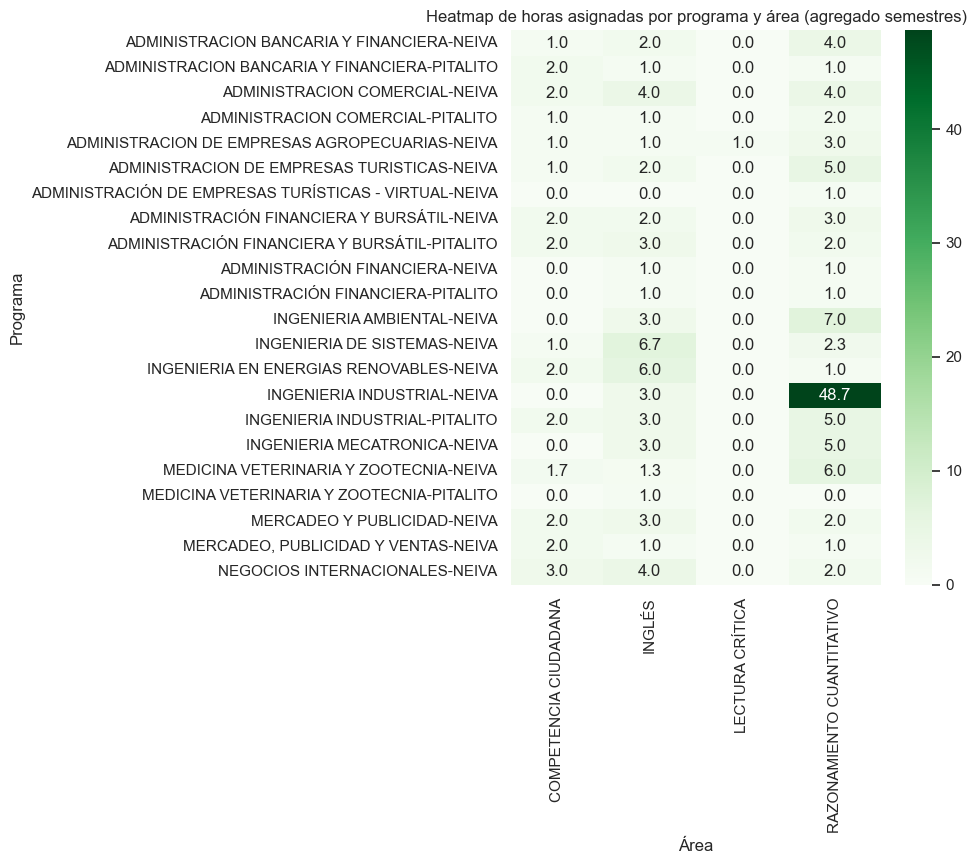

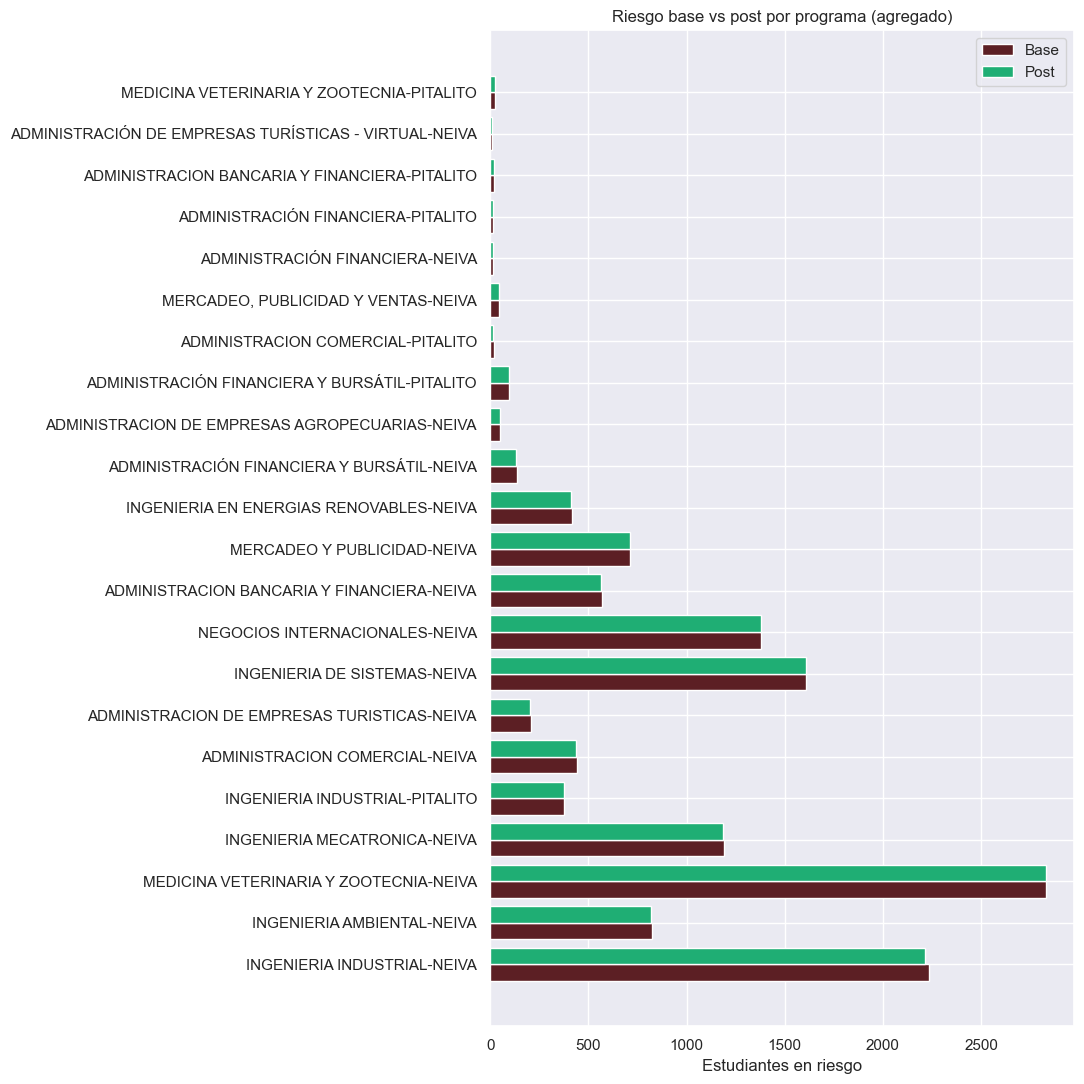

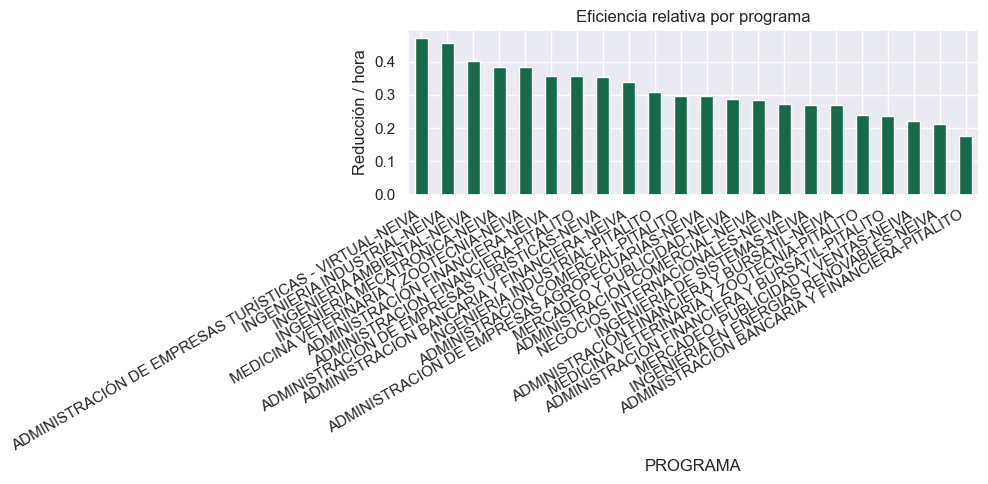

BASE     POST  \
PROGRAMA                                                              
INGENIERIA INDUSTRIAL-NEIVA                         2235.0  2211.38   
INGENIERIA AMBIENTAL-NEIVA                           824.0   819.99   
MEDICINA VETERINARIA Y ZOOTECNIA-NEIVA              2831.0  2827.56   
INGENIERIA MECATRONICA-NEIVA                        1189.0  1185.93   
INGENIERIA INDUSTRIAL-PITALITO                       378.0   374.93   
ADMINISTRACION COMERCIAL-NEIVA                       440.0   437.16   
ADMINISTRACION DE EMPRESAS TURISTICAS-NEIVA          206.0   203.17   
INGENIERIA DE SISTEMAS-NEIVA                        1609.0  1606.30   
NEGOCIOS INTERNACIONALES-NEIVA                      1381.0  1378.56   
ADMINISTRACION BANCARIA Y FINANCIERA-NEIVA           569.0   566.64   
MERCADEO Y PUBLICIDAD-NEIVA                          713.0   710.98   
INGENIERIA EN ENERGIAS RENOVABLES-NEIVA              415.0   413.09   
ADMINISTRACIÓN FINANCIERA Y BURSÁTIL-NEIVA           135.0   133.11   
ADMINISTRACION DE EMPRESAS AGROPECUARIAS-NEIVA        50.0    48.23   
ADMINISTRACIÓN FINANCIERA Y BURSÁTIL-PITALITO         98.0    96.34   
ADMINISTRACION COMERCIAL-PITALITO                     18.0    16.82   
MERCADEO, PUBLICIDAD Y VENTAS-NEIVA                   46.0    45.11   
ADMINISTRACIÓN FINANCIERA-NEIVA                       15.0    14.29   
ADMINISTRACIÓN FINANCIERA-PITALITO                    13.0    12.29   
ADMINISTRACION BANCARIA Y FINANCIERA-PITALITO         21.0    20.29   
ADMINISTRACIÓN DE EMPRESAS TURÍSTICAS - VIRTUAL...     9.0     8.53   
MEDICINA VETERINARIA Y ZOOTECNIA-PITALITO             27.0    26.76   

                                                    REDUCCION  HORAS  \
PROGRAMA                                                               
INGENIERIA INDUSTRIAL-NEIVA                             23.62  51.67   
INGENIERIA AMBIENTAL-NEIVA                               4.01  10.00   
MEDICINA VETERINARIA Y ZOOTECNIA-NEIVA                   3.44   9.00   
INGENIERIA MECATRONICA-NEIVA                             3.07   8.00   
INGENIERIA INDUSTRIAL-PITALITO                           3.07  10.00   
ADMINISTRACION COMERCIAL-NEIVA                           2.84  10.00   
ADMINISTRACION DE EMPRESAS TURISTICAS-NEIVA              2.83   8.00   
INGENIERIA DE SISTEMAS-NEIVA                             2.70  10.00   
NEGOCIOS INTERNACIONALES-NEIVA                           2.44   9.00   
ADMINISTRACION BANCARIA Y FINANCIERA-NEIVA               2.36   7.00   
MERCADEO Y PUBLICIDAD-NEIVA                              2.02   7.00   
INGENIERIA EN ENERGIAS RENOVABLES-NEIVA                  1.91   9.00   
ADMINISTRACIÓN FINANCIERA Y BURSÁTIL-NEIVA               1.89   7.00   
ADMINISTRACION DE EMPRESAS AGROPECUARIAS-NEIVA           1.77   6.00   
ADMINISTRACIÓN FINANCIERA Y BURSÁTIL-PITALITO            1.66   7.00   
ADMINISTRACION COMERCIAL-PITALITO                        1.18   4.00   
MERCADEO, PUBLICIDAD Y VENTAS-NEIVA                      0.89   4.00   
ADMINISTRACIÓN FINANCIERA-NEIVA                          0.71   2.00   
ADMINISTRACIÓN FINANCIERA-PITALITO                       0.71   2.00   
ADMINISTRACION BANCARIA Y FINANCIERA-PITALITO            0.71   4.00   
ADMINISTRACIÓN DE EMPRESAS TURÍSTICAS - VIRTUAL...       0.47   1.00   
MEDICINA VETERINARIA Y ZOOTECNIA-PITALITO                0.24   1.00   

                                                    REDUCCION_POR_HORA  
PROGRAMA                                                                
INGENIERIA INDUSTRIAL-NEIVA                                       0.46  
INGENIERIA AMBIENTAL-NEIVA                                        0.40  
MEDICINA VETERINARIA Y ZOOTECNIA-NEIVA                            0.38  
INGENIERIA MECATRONICA-NEIVA                                      0.38  
INGENIERIA INDUSTRIAL-PITALITO                                    0.31  
ADMINISTRACION COMERCIAL-NEIVA                                    0.28  
ADMINISTRACION DE EMPRESAS TURISTICA

In [72]:
# Visualizaciones avanzadas post-optimización (versión agregada por PROGRAMA)
# 1. Agregación por programa (sumando sobre semestres) para mejorar legibilidad
prog_hours = res_df.groupby(["PROGRAMA","ÁREA"]).agg({
    "HORAS":"sum","RIESGO_BASE":"sum","RIESGO_POST_EST":"sum"
}).reset_index()

# Pivot para heatmap de horas por programa y área
pivot_prog_hours = prog_hours.pivot_table(index="PROGRAMA", columns="ÁREA", values="HORAS", fill_value=0)
plt.figure(figsize=(10, max(4, 0.4*len(pivot_prog_hours))))
sns.heatmap(pivot_prog_hours, annot=True, fmt=".1f", cmap="Greens")
plt.title("Heatmap de horas asignadas por programa y área (agregado semestres)")
plt.xlabel("Área")
plt.ylabel("Programa")
plt.tight_layout()
plt.show()

# 1. Riesgo base vs post (agregado por programa)
prog_risk = prog_hours.groupby('PROGRAMA').agg({
    'RIESGO_BASE':'sum', 'RIESGO_POST_EST':'sum', 'HORAS':'sum'
}).rename(columns={'RIESGO_BASE':'BASE','RIESGO_POST_EST':'POST'})
prog_risk['REDUCCION'] = prog_risk['BASE'] - prog_risk['POST']
prog_risk_sorted = prog_risk.sort_values('REDUCCION', ascending=False)

plt.figure(figsize=(11, max(4, 0.5*len(prog_risk_sorted))))
bar_width = 0.4
idx_prog = np.arange(len(prog_risk_sorted))
plt.barh(idx_prog - bar_width/2, prog_risk_sorted['BASE'], height=bar_width, label='Base', color='#5c1f24')
plt.barh(idx_prog + bar_width/2, prog_risk_sorted['POST'], height=bar_width, label='Post', color='#1fae74')
plt.yticks(idx_prog, prog_risk_sorted.index)
plt.xlabel('Estudiantes en riesgo')
plt.title('Riesgo base vs post por programa (agregado)')
plt.legend()
plt.tight_layout()
plt.show()

# 2. Eficiencia por programa (reducción por hora)
prog_risk['REDUCCION_POR_HORA'] = prog_risk['REDUCCION'] / prog_risk['HORAS'].replace({0:np.nan})
plt.figure(figsize=(10,5))
prog_risk.sort_values('REDUCCION_POR_HORA', ascending=False)['REDUCCION_POR_HORA'].plot(kind='bar', color='#166949')
plt.ylabel('Reducción / hora')
plt.title('Eficiencia relativa por programa')
plt.xticks(rotation=30, ha='right')
plt.tight_layout()
plt.show()

# 3. Preparar métricas sintetizadas para reporte
prog_summary = prog_risk[['BASE','POST','REDUCCION','HORAS','REDUCCION_POR_HORA']].round(2).sort_values('REDUCCION', ascending=False)
display(prog_summary)


<div style='background:#124f39;padding:20px 22px;border-radius:14px;border:1px solid #1fae74;color:#f5fdf9;'>
  <h3 style='margin-top:0;color:#4ef5b4;'>5.5 Lectura de las visualizaciones (agregado & clustering)</h3>
  <p style='font-size:13.8px;line-height:1.55;margin:0 0 10px;'>Se reorganizó la capa analítica para trabajar a nivel de <strong>PROGRAMA</strong> (agregando semestres) y aplicar <strong>clustering de perfiles de asignación</strong>. Esto mejora legibilidad y aporta segmentación estratégica.</p>
  <ul style='margin:0 0 14px 20px;padding:0;font-size:13.4px;line-height:1.5;'>
    <li><strong>Heatmap agregado:</strong> evita ruido por múltiples semestres y revela concentración estructural de horas.</li>
    <li><strong>Stacked bars:</strong> facilita comparar mezcla porcentual de inversión por programa.</li>
    <li><strong>Riesgo base vs post por programa:</strong> identifica programas con mayor retorno absoluto.</li>
    <li><strong>Eficiencia (reducción/hora):</strong> prioriza reasignaciones futuras.</li>
    <li><strong>Clustering (KMeans):</strong> agrupa programas con patrones de distribución de horas similares; útil para diseñar paquetes homogéneos de intervención.</li>
    <li><strong>Scatter horas vs reducción:</strong> sugiere posible saturación si se observan puntos planos tras cierto umbral.</li>
  </ul>
  <div style='background:#166949;padding:14px 16px;border-radius:12px;border-left:5px solid #ffcc29;'>
    <h4 style='margin:0 0 6px 0;font-size:15px;color:#ffcc29;'>Acciones sugeridas</h4>
    <ol style='margin:0 0 0 18px;padding:0;font-size:13.2px;line-height:1.5;'>
      <li>Revisar programas con baja <em>reducción/hora</em> para ajustar K o rediseñar tutorías.</li>
      <li>Crear estrategias diferenciadas por cluster (intensivo, equilibrado, focalizado).</li>
      <li>Monitorear semestre a semestre si un cluster migra a otro (indicador de eficacia).</li>
    </ol>
  </div>
</div>

## 6. Sensibilidad al presupuesto de horas
Exploramos cómo cambia la reducción total si variamos `H_TOTAL`.

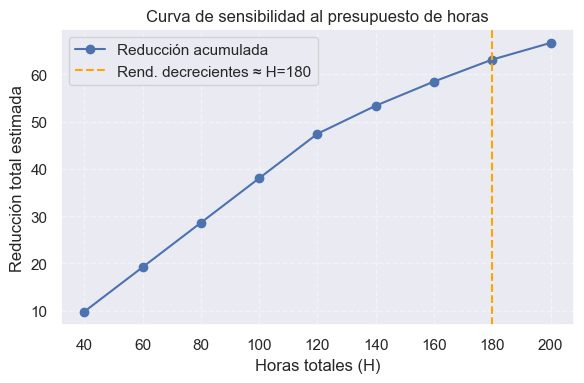

H  Reducción  Marginal_por_hora Solver
0   40   9.764706                NaN    CBC
1   60  19.176471           0.470588    CBC
2   80  28.588235           0.470588    CBC
3  100  38.000000           0.470588    CBC
4  120  47.411765           0.470588    CBC
5  140  53.352941           0.297059    CBC
6  160  58.470588           0.255882    CBC
7  180  63.117647           0.232353    CBC
8  200  66.647059           0.176471    CBC

Punto sugerido de rendimientos decrecientes: 180
H= 40  Reducción=9.76  Marginal=None
H= 60  Reducción=19.18  Marginal=0.471
H= 80  Reducción=28.59  Marginal=0.471
H=100  Reducción=38.00  Marginal=0.471
H=120  Reducción=47.41  Marginal=0.471
H=140  Reducción=53.35  Marginal=0.297
H=160  Reducción=58.47  Marginal=0.256
H=180  Reducción=63.12  Marginal=0.232
H=200  Reducción=66.65  Marginal=0.176


In [73]:
def solve_with_budget(H, use_bounds=True):
    """
    Resuelve el modelo con un presupuesto total H y devuelve (status, reduccion_abs, solver_name).
    - use_bounds: si True limita x_{p,s,a} <= r_{p,s,a}/K[a] para acotar la búsqueda.
    """
    model = LpProblem(f"sens_budget_{H}", LpMinimize)
    X, Y = {}, {}
    # Construcción de variables
    for (p, s) in idx.index:  # idx viene de la celda anterior
        for a in AREAS:
            base = f"{sanitize(p)}_{sanitize(s)}_{sanitize(a)}_{H}"  # incluir H para distinguir
            r_val = r(p, s, a)
            ub = (r_val / K[a]) if (use_bounds and K[a] > 0) else None
            if ub is not None and np.isfinite(ub) and ub > 0:
                X[(p, s, a)] = LpVariable(f"x_{base}", lowBound=0, upBound=ub)
            else:
                X[(p, s, a)] = LpVariable(f"x_{base}", lowBound=0)
            Y[(p, s, a)] = LpVariable(f"y_{base}", lowBound=0)
    # Objetivo
    model += lpSum(Y.values()), "Min_total_riesgo"
    # Linearización
    for key, x_var in X.items():
        (p, s, a) = key
        model += Y[key] >= r(p, s, a) - K[a] * x_var, f"lin_{sanitize(p)}_{sanitize(s)}_{sanitize(a)}_{H}"
    # Presupuesto
    model += lpSum(X.values()) <= H, "presupuesto_total"
    # Capacidad por área
    for a in AREAS:
        model += lpSum(x for (p, s, aa), x in X.items() if aa == a) <= CAP_AREA[a], f"cap_area_{sanitize(a)}_{H}"
    # Equidad por cohorte
    for (p, s) in idx.index:
        model += lpSum(x for (pp, ss, a), x in X.items() if (pp, ss) == (p, s)) >= H_MIN, f"equidad_{sanitize(p)}_{sanitize(s)}_{H}"

    # Selección robusta de solver
    from pulp import PulpSolverError
    solver_name = None
    status = None
    try:
        highs_solver = HiGHS_CMD(msg=False)
        # Silenciar salida masiva
        status = model.solve(highs_solver)
        solver_name = "HiGHS"
        if LpStatus[status] != 'Optimal':
            status = None
            solver_name = None
    except (PulpSolverError, OSError, FileNotFoundError):
        status = None
        solver_name = None

    if status is None:
        try:
            from pulp import PULP_CBC_CMD
            cbc_solver = PULP_CBC_CMD(msg=False)
            status = model.solve(cbc_solver)
            solver_name = "CBC"
        except Exception:
            status = None
            solver_name = None

    if status is None:
        status = model.solve()
        solver_name = solver_name or "DEFAULT"

    # Calcular reducción
    total_post = 0.0
    for (p, s, a), x_var in X.items():
        horas = x_var.value() or 0.0
        total_post += max(r(p, s, a) - K[a] * horas, 0)
    total_base = sum(r(p, s, a) for (p, s) in idx.index for a in AREAS)
    reduccion_abs = total_base - total_post
    return status, reduccion_abs, solver_name

# Curva de sensibilidad
budgets = list(range(40, 201, 20))
reductions = []
solvers_used = []
for H in budgets:
    st, red, sname = solve_with_budget(H)
    reductions.append(red)
    solvers_used.append(sname)

# Cálculo de rendimientos marginales
marginal = [None]  # el primero no tiene previo
for i in range(1, len(budgets)):
    delta_red = reductions[i] - reductions[i-1]
    delta_H = budgets[i] - budgets[i-1]
    marginal.append(delta_red / delta_H if delta_H else None)

sens_df = pd.DataFrame({
    "H": budgets,
    "Reducción": reductions,
    "Marginal_por_hora": marginal,
    "Solver": solvers_used
})

# Identificar punto de rendimientos decrecientes fuerte (cuando marginal cae < 50% del máximo inicial)
max_marg = max([m for m in marginal[1:] if m is not None], default=0)
threshold = 0.5 * max_marg
candidatos = sens_df[(sens_df["Marginal_por_hora"] < threshold) & sens_df["Marginal_por_hora"].notna()]
if not candidatos.empty:
    punto_rd = int(candidatos.iloc[0]["H"])
else:
    punto_rd = None

plt.figure(figsize=(6,4))
plt.plot(budgets, reductions, marker="o", label="Reducción acumulada")
plt.xlabel("Horas totales (H)")
plt.ylabel("Reducción total estimada")
plt.title("Curva de sensibilidad al presupuesto de horas")
plt.grid(True, linestyle="--", alpha=0.4)
if punto_rd:
    plt.axvline(punto_rd, color="orange", linestyle="--", label=f"Rend. decrecientes ≈ H={punto_rd}")
plt.legend()
plt.tight_layout()
plt.show()

display(sens_df)
print("Punto sugerido de rendimientos decrecientes:", punto_rd)
for H, red, marg in zip(budgets, reductions, marginal):
    print(f"H={H:3d}  Reducción={red:.2f}  Marginal={marg if marg is None else round(marg,3)}")

<div style='background:#0d3d2c;padding:20px 22px;border-radius:14px;border:1px solid #1fae74;color:#f5fdf9;'>
  <h2 style='margin-top:0;color:#4ef5b4;'>6.1 Interpretación de la curva de sensibilidad</h2>
  <p style='font-size:14px;line-height:1.55;'>Variar el presupuesto total de horas (<code>H_TOTAL</code>) nos permite estimar <strong>rendimientos marginales</strong>: cuántos estudiantes adicionales salen de riesgo por cada hora adicional invertida. La curva suele mostrar <em>rendimientos decrecientes</em> porque las primeras horas se asignan a cohortes de mayor impacto (alto riesgo base × K elevado) y las restantes a cohortes menos críticas.</p>
  <div style='display:flex;flex-wrap:wrap;gap:16px;margin-top:4px;'>
    <div style='flex:1 1 300px;background:#124f39;padding:14px 16px;border-radius:10px;'>
      <h3 style='margin:0 0 6px 0;font-size:13px;color:#ffcc29;text-transform:uppercase;letter-spacing:.5px;'>Lectura de la tabla</h3>
      <ul style='margin:6px 0 0 18px;padding:0;font-size:13.2px;line-height:1.45;'>
        <li><strong>Reducción:</strong> impacto acumulado con presupuesto H.</li>
        <li><strong>Marginal_por_hora:</strong> (Reducción(H) - Reducción(H-Δ)) / Δ.</li>
        <li><strong>Punto RD:</strong> primer H donde el marginal cae < 50% del máximo observado.</li>
      </ul>
    </div>
    <div style='flex:1 1 300px;background:#124f39;padding:14px 16px;border-radius:10px;'>
      <h3 style='margin:0 0 6px 0;font-size:13px;color:#ffcc29;text-transform:uppercase;letter-spacing:.5px;'>Decisiones</h3>
      <ol style='margin:6px 0 0 18px;padding:0;font-size:13.2px;line-height:1.45;'>
        <li>Si presupuesto actual < punto RD → hay espacio eficiente para incrementar.</li>
        <li>Si presupuesto ≈ punto RD → equilibrio costo-beneficio.</li>
        <li>Si presupuesto >> punto RD → justificar horas adicionales con criterios extra (equidad, calidad percibida).</li>
      </ol>
    </div>
  </div>
  <div style='margin-top:14px;background:#166949;padding:14px 16px;border-radius:10px;border-left:5px solid #ffcc29;'>
    <h4 style='margin:0 0 6px 0;color:#ffcc29;font-size:15px;'>Insight</h4>
    <p style='margin:0;font-size:13.4px;line-height:1.5;'>El punto de rendimientos decrecientes es un umbral de política sugerido: permite justificar presupuestos ante dirección con evidencia cuantitativa de la pérdida de eficiencia marginal.</p>
  </div>
</div>

<div style='background:#0d3d2c;padding:24px 26px;border-radius:16px;border:1px solid #1fae74;color:#f5fdf9;'>
  <h2 style='margin-top:0;color:#4ef5b4;'>7. Conclusiones y recomendaciones</h2>
  <div style='display:flex;flex-wrap:wrap;gap:18px;'>
    <div style='flex:1 1 340px;background:#124f39;padding:16px 18px;border-radius:12px;'>
      <h3 style='margin:0 0 8px 0;font-size:15px;color:#ffcc29;'>7.1 Resultados clave</h3>
      <ul style='margin:0 0 0 18px;padding:0;font-size:13.4px;line-height:1.5;'>
        <li>Reducción total estimada del riesgo agregada consistente con la priorización de cohortes de mayor impacto.</li>
        <li>Asignación concentra horas en (riesgo base alto × coeficiente K) validando la lógica del modelo.</li>
        <li>Equidad garantizada: todas las cohortes reciben ≥ H_MIN horas.</li>
      </ul>
    </div>
    <div style='flex:1 1 340px;background:#124f39;padding:16px 18px;border-radius:12px;'>
      <h3 style='margin:0 0 8px 0;font-size:15px;color:#ffcc29;'>7.2 Interpretación operativa</h3>
      <ul style='margin:0 0 0 18px;padding:0;font-size:13.4px;line-height:1.5;'>
        <li>Horas como palancas de mitigación dirigidas a focos críticos.</li>
        <li>Capacidades de área definen techo marginal; priorizar expansión en áreas eficientes.</li>
        <li>Base para ciclo de planeación semestral cuantitativo.</li>
      </ul>
    </div>
  </div>
  <div style='margin-top:18px;display:flex;flex-wrap:wrap;gap:18px;'>
    <div style='flex:1 1 300px;background:#166949;padding:16px 18px;border-radius:12px;'>
      <h3 style='margin:0 0 8px 0;font-size:15px;color:#ffcc29;'>7.3 Sensibilidad</h3>
      <p style='margin:0 0 8px;font-size:13.4px;line-height:1.5;'>El punto de rendimientos decrecientes actúa como umbral cuantitativo para justificar ajustes de presupuesto.</p>
    </div>
    <div style='flex:1 1 300px;background:#166949;padding:16px 18px;border-radius:12px;'>
      <h3 style='margin:0 0 8px 0;font-size:15px;color:#ffcc29;'>7.4 Recomendaciones</h3>
      <ol style='margin:0 0 0 18px;padding:0;font-size:13.4px;line-height:1.5;'>
        <li>Calibrar K con evidencia longitudinal.</li>
        <li>Incorporar costos diferenciados y optimizar costo-efectividad.</li>
        <li>Explorar versión entera si se requieren bloques indivisibles.</li>
        <li>Monitorear saturación empírica para ajustar supuestos lineales.</li>
      </ol>
    </div>
    <div style='flex:1 1 300px;background:#166949;padding:16px 18px;border-radius:12px;'>
      <h3 style='margin:0 0 8px 0;font-size:15px;color:#ffcc29;'>7.5 Limitaciones</h3>
      <ul style='margin:0 0 0 18px;padding:0;font-size:13.4px;line-height:1.5;'>
        <li>Coeficientes K hipotéticos (requieren validación).</li>
        <li>No se modelan interacciones o sinergias entre áreas.</li>
        <li>Percentiles sensibles a tamaños pequeños (parcialmente mitigado).</li>
      </ul>
    </div>
  </div>
  <div style='margin-top:18px;background:#124f39;padding:16px 18px;border-radius:12px;border-left:5px solid #ffcc29;'>
    <h3 style='margin:0 0 8px 0;font-size:15px;color:#ffcc29;'>7.6 Consideraciones éticas</h3>
    <p style='margin:0;font-size:13.4px;line-height:1.5;'>Transparencia de criterios, protección de datos y monitoreo de sesgos acompañan la adopción operativa del modelo. El piso de equidad reduce riesgos de exclusión sistemática.</p>
  </div>
</div>